In [1]:
import numpy as np
from ddqla.agents import BaseAgent
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers.legacy import Adam
from keras.losses import MeanSquaredError


class Imex(BaseAgent):
    __ACTIONS = 4
    __STARTUP_ENVIRONMENT = np.asarray([7, 4, 1, 4], dtype=np.float32)
    __MATRIX_SIDE_DIM = 9
    __DENSE_DIM = 1024

    def __init__(self):
        super().__init__(
            Imex.__ACTIONS,
            Imex.__STARTUP_ENVIRONMENT,
            fit_each_n_steps=7,
            cumulative_rewards_max_length=700
        )

    def _get_model(self, state_features):
        inputs = Input(shape=(state_features,))
        dense = Dense(Imex.__DENSE_DIM, activation='swish')(inputs)
        dense = Dense(Imex.__DENSE_DIM, activation='swish')(dense)
        outputs = Dense(Imex.__ACTIONS, activation='linear')(dense)
        model = Model(inputs=inputs, outputs=outputs)
        model.compile(optimizer=Adam(), loss=MeanSquaredError())
        #model.summary()
        return model

    def reset_state(self):
        self._state = Imex.__STARTUP_ENVIRONMENT

    def _get_reward(self, action, environment):
        self.environment_log.append(environment)
        reward = -1
        new_pos = np.asarray([self._state[0], self._state[1]])
        match action:
            case 0:  # up
                new_pos[1] -= 1
            case 1:  # right
                new_pos[0] += 1
            case 2:  # down
                new_pos[1] += 1
            case 3:  # left
                new_pos[0] -= 1
        if 0 <= new_pos[0] < Imex.__MATRIX_SIDE_DIM and 0 <= new_pos[1] < Imex.__MATRIX_SIDE_DIM:
            environment[0] = new_pos[0]
            environment[1] = new_pos[1]
            self._state[0] = new_pos[0]
            self._state[1] = new_pos[1]
        if new_pos[0] == self._state[2] and new_pos[1] == self._state[3]:
            reward = 6
            environment[0] = Imex.__STARTUP_ENVIRONMENT[0]
            environment[1] = Imex.__STARTUP_ENVIRONMENT[1]
            environment[2] = Imex.__STARTUP_ENVIRONMENT[2]
            environment[3] = Imex.__STARTUP_ENVIRONMENT[3]
        return reward


In [2]:
imex = Imex()

In [3]:
for step in range(0, 20000):
    imex.step()
    if step % 100 == 0 and imex.is_memory_ready():
        rewards = imex.test(60)
        cum_rewards = imex.get_last_cumulative_rewards()
        print('#', step, '  CR: ', np.sum(cum_rewards), '  R: ', rewards)

# 1100   CR:  -567   R:  -60
# 1200   CR:  -581   R:  -60
# 1300   CR:  -609   R:  -60
# 1400   CR:  -623   R:  -60
# 1500   CR:  -609   R:  -60
# 1600   CR:  -644   R:  -60
# 1700   CR:  -665   R:  -60
# 1800   CR:  -679   R:  -60
# 1900   CR:  -679   R:  -60
# 2000   CR:  -623   R:  -60
# 2100   CR:  -623   R:  -60
# 2200   CR:  -637   R:  -60
# 2300   CR:  -644   R:  -60
# 2400   CR:  -616   R:  -60
# 2500   CR:  -616   R:  -60
# 2600   CR:  -609   R:  -60
# 2700   CR:  -651   R:  -60
# 2800   CR:  -637   R:  -60
# 2900   CR:  -616   R:  -60
# 3000   CR:  -616   R:  -60
# 3100   CR:  -623   R:  -60
# 3200   CR:  -616   R:  -60
# 3300   CR:  -623   R:  -60
# 3400   CR:  -602   R:  -60
# 3500   CR:  -609   R:  -60
# 3600   CR:  -630   R:  -60
# 3700   CR:  -630   R:  -60
# 3800   CR:  -651   R:  -60
# 3900   CR:  -651   R:  -60
# 4000   CR:  -651   R:  -60
# 4100   CR:  -686   R:  -60
# 4200   CR:  -693   R:  -60
# 4300   CR:  -658   R:  -60
# 4400   CR:  -658   R:  -60
# 4500   CR:  

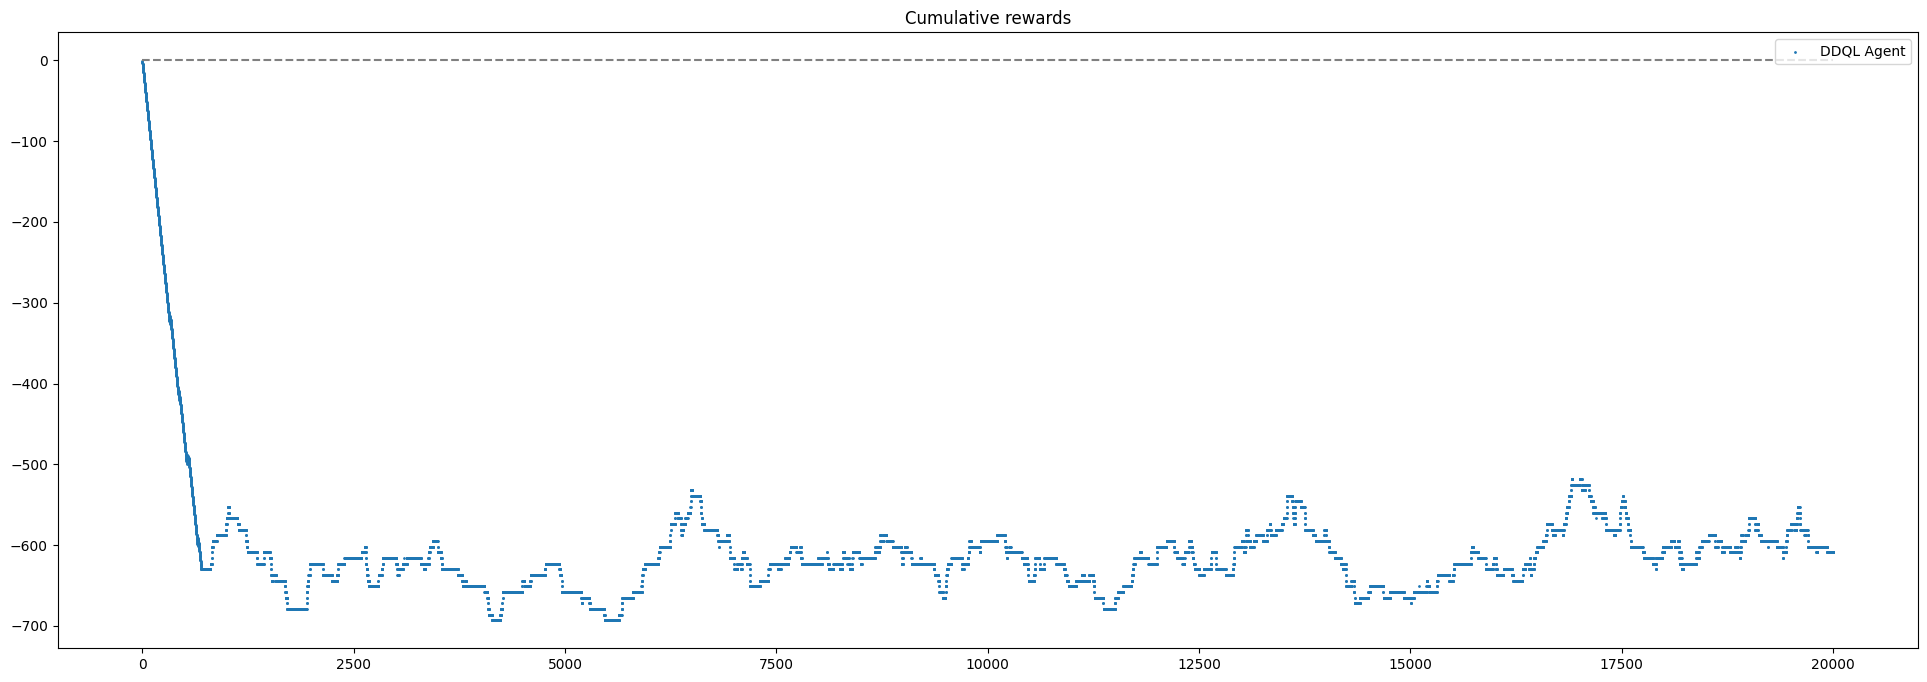

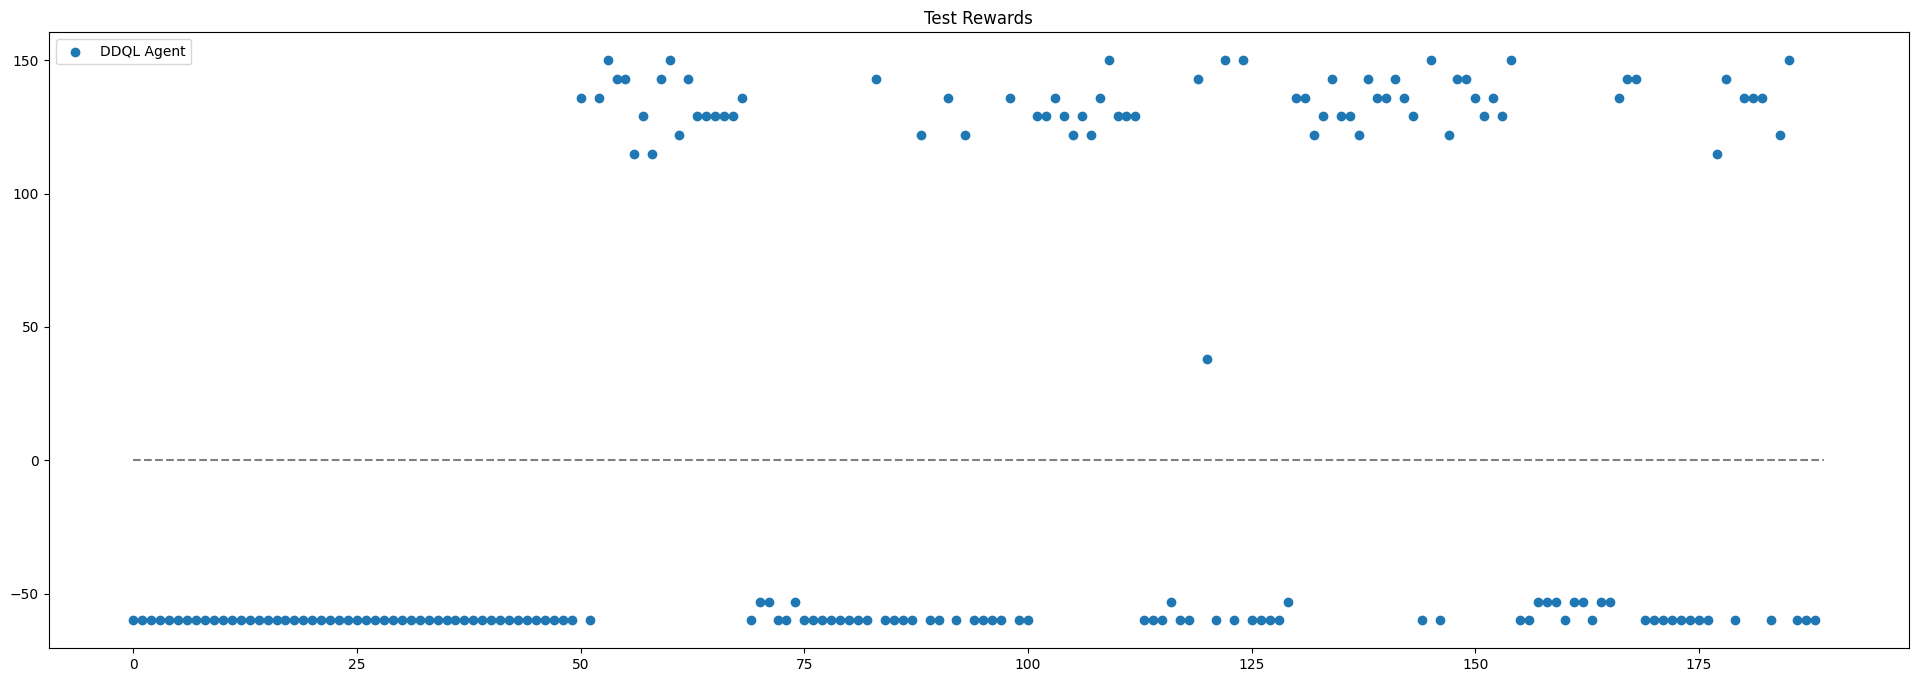

In [4]:
imex.summary()